<a href="https://colab.research.google.com/github/Omaam/gcl/blob/main/gcl/hardlag_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='talk')

In [ ]:
def symccf(a, base_side='left'):

    # make array
    corr_sym = np.copy(a) if base_side == 'left' else np.copy(a[::-1])

    # get center index + 1
    idx_med_m2 = int(np.floor(len(corr_sym)/2)) - 1
    idx_med_p1 = int(np.ceil(len(corr_sym)/2))

    # substitute
    corr_sym[idx_med_p1:] = corr_sym[idx_med_m2::-1]

    # substraction
    corr_rest = a - corr_sym

    # arrangement
    out = corr_rest if base_side == 'left' else corr_rest[::-1]

    return out

In [ ]:
t = np.linspace(-4, 4, 9)
base = np.logspace(-1, 4, 9)
base = np.append(base, base[-2::-1])
t, base

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 array([1.00000000e-01, 4.21696503e-01, 1.77827941e+00, 7.49894209e+00,
        3.16227766e+01, 1.33352143e+02, 5.62341325e+02, 2.37137371e+03,
        1.00000000e+04, 2.37137371e+03, 5.62341325e+02, 1.33352143e+02,
        3.16227766e+01, 7.49894209e+00, 1.77827941e+00, 4.21696503e-01,
        1.00000000e-01]))

In [ ]:
c0 = 8*base[4:13]
c1 = base[3:12]

In [ ]:
b = 2.5*c0 + 1.0*c1
c = 2.0*c0 + 1.5*c1
d = 1.5*c0 + 2.0*c1
b_sym = symccf(b)
c_sym = symccf(c)
d_sym = symccf(d)

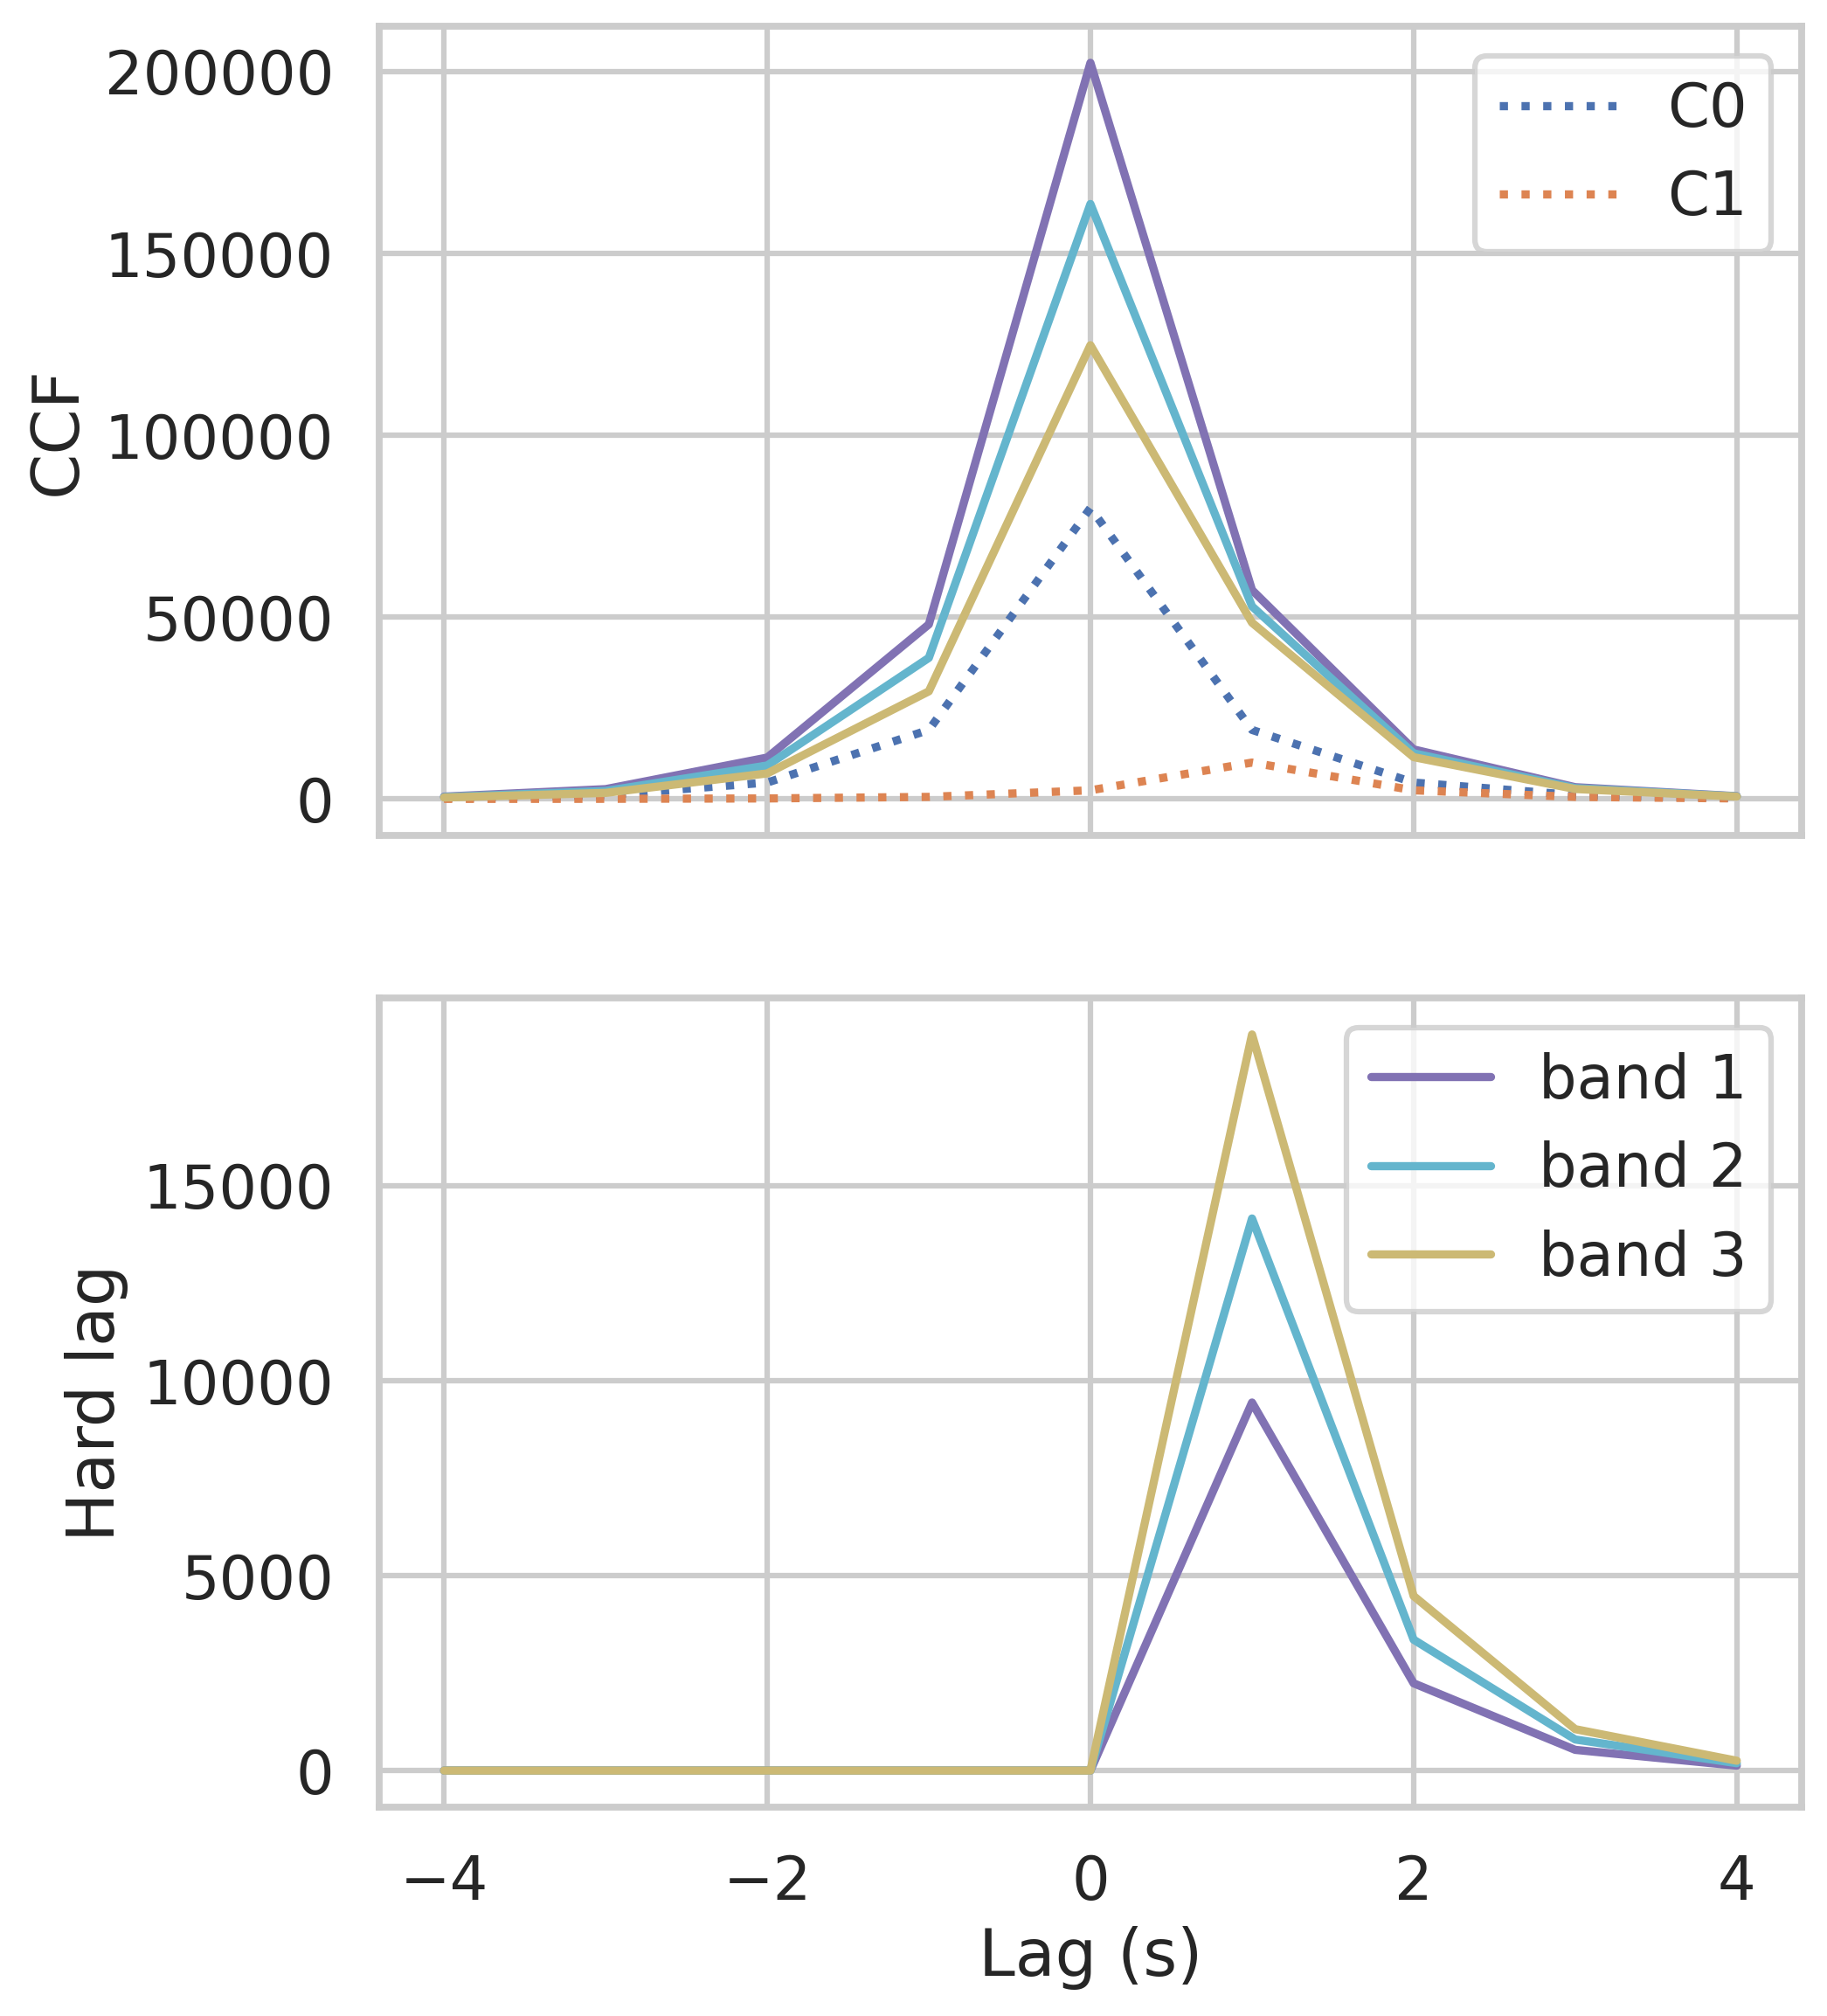

In [ ]:
fig, ax = plt.subplots(2, figsize=(7, 9), sharex=True, dpi=300)
ax[0].plot(t, c0, t, c1, ls=':')
ax[0].plot(t, b, color='m', label='band1')
ax[0].plot(t, c, color='c', label='band2')
ax[0].plot(t, d, color='y', label='band3')
ax[0].set_ylabel('CCF')
ax[0].legend(['C0', 'C1'])

ax[1].plot(t, b_sym, color='m')
ax[1].plot(t, c_sym, color='c')
ax[1].plot(t, d_sym, color='y')
ax[1].set_ylabel('Hard lag')
ax[1].set_xlabel('Lag (s)')
# ax[1].legend(['band 1 (2.5xC0+1.0xC1)', 'band 2 (2.0xC0+1.5xC1)', 'band 3 (1.5xC0+2.0xC1)'],
ax[1].legend(['band 1', 'band 2', 'band 3'],
             loc='best')
plt.show()